In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
import sys

#sys.path.append('../exadata/parquet_dataset/query_tool/')
#import query_tool
#from query_tool import M100DataClient

In [2]:
# RACK subdivision:
racks = {}
count = 0

for i in range(49):
    nodes = [x + count for x in range(20)]
    racks[i] = nodes
    count += 20

print(racks)

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 1: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 2: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 3: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 4: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 5: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 6: [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], 7: [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159], 8: [160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179], 9: [180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199], 10: [200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,

In [3]:
# We need to import three datasets, one for the input power supply for the node 0, one for the node 1 and one for the total power of both nodes
path_P0 = "../21-01/year_month=21-01/plugin=ipmi_pub/metric=ps0_input_power/a_0.parquet" 
path_P1 = "../21-01/year_month=21-01/plugin=ipmi_pub/metric=ps1_input_power/a_0.parquet"
path_TotP = "../21-01/year_month=21-01/plugin=ipmi_pub/metric=total_power/a_0.parquet"

In [4]:
dataset_P0 = pd.read_parquet(path_P0, engine='pyarrow')
dataset_P1 = pd.read_parquet(path_P1, engine='pyarrow')
dataset_TotP = pd.read_parquet(path_TotP, engine='pyarrow')

We decided to study the dataset related to January 2021, with samples taken each 20 sec, reason why running the code cells will take time and memory.

In [5]:
# We need to cast the node values into integers
dataset_P0['node'] = dataset_P0['node'].astype(int)
dataset_P1['node'] = dataset_P1['node'].astype(int)
dataset_TotP['node'] = dataset_TotP['node'].astype(int)

In [5]:
# Then we want to group the datasets into subsets, one for each node
# This will automatically sort each group in order of time
grouped = dataset_P0.groupby('node')
node_datasets_P0 = {}
for node, group in grouped:
    node_datasets_P0[node] = group.copy()

node_datasets_P0

{'0':                           timestamp  value node
 219646    2021-01-24 23:00:00+00:00    240    0
 219647    2021-01-24 23:00:20+00:00    240    0
 219648    2021-01-24 23:00:40+00:00    240    0
 219649    2021-01-24 23:01:00+00:00    240    0
 219650    2021-01-24 23:01:20+00:00    240    0
 ...                             ...    ...  ...
 109189864 2021-01-30 22:00:00+00:00    240    0
 109191276 2021-01-11 23:00:00+00:00    250    0
 109191721 2021-01-28 23:00:00+00:00    240    0
 109194609 2021-01-15 23:00:00+00:00    240    0
 109196905 2021-01-09 22:00:00+00:00    240    0
 
 [114858 rows x 3 columns],
 '1':                           timestamp  value node
 223965    2021-01-24 23:00:00+00:00    260    1
 223966    2021-01-24 23:00:20+00:00    260    1
 223967    2021-01-24 23:00:40+00:00    260    1
 223968    2021-01-24 23:01:00+00:00    260    1
 223969    2021-01-24 23:01:20+00:00    260    1
 ...                             ...    ...  ...
 109192310 2021-01-17 22:00:0

In [6]:
grouped = dataset_P1.groupby('node')
node_datasets_P1 = {}
for node, group in grouped:
    node_datasets_P1[node] = group.copy()

node_datasets_P1

{'0':                           timestamp  value node
 1491830   2021-01-18 23:00:00+00:00    300    0
 1491831   2021-01-18 23:00:20+00:00    300    0
 1491832   2021-01-18 23:00:40+00:00    300    0
 1491833   2021-01-18 23:01:00+00:00    300    0
 1491834   2021-01-18 23:01:20+00:00    300    0
 ...                             ...    ...  ...
 108949520 2021-01-29 23:00:00+00:00    290    0
 108949971 2021-01-30 22:00:00+00:00    290    0
 108950278 2021-01-11 23:00:00+00:00    300    0
 108951241 2021-01-09 22:00:00+00:00    300    0
 108952687 2021-01-15 23:00:00+00:00    300    0
 
 [114858 rows x 3 columns],
 '1':                           timestamp  value node
 1494688   2021-01-18 23:00:00+00:00    290    1
 1494689   2021-01-18 23:00:20+00:00    290    1
 1494690   2021-01-18 23:00:40+00:00    290    1
 1494691   2021-01-18 23:01:00+00:00    290    1
 1494692   2021-01-18 23:01:20+00:00    290    1
 ...                             ...    ...  ...
 108950121 2021-01-25 23:00:0

In [7]:
grouped = dataset_TotP.groupby('node')
node_datasets_TotP = {}
for node, group in grouped:
    node_datasets_TotP[node] = group.copy()

node_datasets_TotP

{'0':                           timestamp  value node
 211842    2021-01-20 23:36:20+00:00    440    0
 211843    2021-01-20 23:36:40+00:00    420    0
 211844    2021-01-20 23:37:00+00:00    440    0
 211845    2021-01-20 23:37:20+00:00    440    0
 211846    2021-01-20 23:37:40+00:00    440    0
 ...                             ...    ...  ...
 112158837 2021-01-31 22:04:00+00:00    440    0
 112158838 2021-01-31 22:04:20+00:00    440    0
 112158839 2021-01-31 22:04:40+00:00    440    0
 112158840 2021-01-31 22:05:00+00:00    440    0
 112158841 2021-01-31 22:05:20+00:00    440    0
 
 [114586 rows x 3 columns],
 '1':                           timestamp  value node
 216053    2021-01-20 23:36:20+00:00    400    1
 216054    2021-01-20 23:36:40+00:00    400    1
 216055    2021-01-20 23:37:00+00:00    400    1
 216056    2021-01-20 23:37:20+00:00    400    1
 216057    2021-01-20 23:37:40+00:00    400    1
 ...                             ...    ...  ...
 112161152 2021-01-31 22:04:0

In [8]:
# To free up some memory space we delete this temporary dataframe
del(grouped)

In [9]:
# TASK 1:
# Now we compute the total input power for each node, summing the values of P0 and P1 input power, and we compare the obtained value with the one present in the total power dataset for the same node
import math

for key in node_datasets_P1:
    computed_sum = node_datasets_P1[key]['value'].cumsum().iloc[-1] + node_datasets_P0[key]['value'].cumsum().iloc[-1]
    registered_sum = node_datasets_TotP[key]['value'].cumsum().iloc[-1]
    print(f'Node {key}: Obtained pwr: {computed_sum / 1000} kW, Total pwr: {registered_sum / 1000} kW -> Percentage difference: {math.floor(100 - (100*(registered_sum / computed_sum)))}%')

Node 0: Obtained pwr: 60857.15 kW, Total pwr: 48841.04 kW -> Percentage difference: 19%
Node 1: Obtained pwr: 64041.9 kW, Total pwr: 46805.42 kW -> Percentage difference: 26%
Node 10: Obtained pwr: 62848.0 kW, Total pwr: 50451.66 kW -> Percentage difference: 19%
Node 100: Obtained pwr: 107069.97 kW, Total pwr: 87854.08 kW -> Percentage difference: 17%
Node 101: Obtained pwr: 106282.38 kW, Total pwr: 85640.6 kW -> Percentage difference: 19%
Node 102: Obtained pwr: 106467.52 kW, Total pwr: 85847.72 kW -> Percentage difference: 19%
Node 103: Obtained pwr: 109923.74 kW, Total pwr: 92140.04 kW -> Percentage difference: 16%
Node 104: Obtained pwr: 75556.96 kW, Total pwr: 61592.94 kW -> Percentage difference: 18%
Node 105: Obtained pwr: 104484.56 kW, Total pwr: 85888.28 kW -> Percentage difference: 17%
Node 106: Obtained pwr: 106901.62 kW, Total pwr: 89212.8 kW -> Percentage difference: 16%
Node 107: Obtained pwr: 91023.92 kW, Total pwr: 73584.64 kW -> Percentage difference: 19%
Node 108: Obt

In [10]:
# Energy computation starting from the power
dataset_P0['energy_kWh'] = dataset_P0['value'] * 20 / 3.6e6
dataset_P1['energy_kWh'] = dataset_P1['value'] * 20 / 3.6e6

dataset_P0

,timestamp,value,node,energy_kWh
0,2021-01-25 03:26:20+00:00,420,155,0.002333
1,2021-01-25 03:26:40+00:00,410,155,0.002278
2,2021-01-25 03:27:00+00:00,460,155,0.002556
3,2021-01-25 03:27:20+00:00,540,155,0.003000
4,2021-01-25 03:27:40+00:00,430,155,0.002389
...,...,...,...,...
112614064,2021-01-09 21:08:40+00:00,410,963,0.002278
112614065,2021-01-09 21:09:00+00:00,360,963,0.002000
112614066,2021-01-09 21:09:20+00:00,340,963,0.001889
112614067,2021-01-09 21:09:40+00:00,410,963,0.002278


In [11]:
# Convert timestamp column to datetime object
dataset_P0['timestamp'] = pd.to_datetime(dataset_P0['timestamp'])

# Extract date part from timestamp
dataset_P0['date'] = dataset_P0['timestamp'].dt.date

grouped = dataset_P0.groupby('date')
daily_datasets_P0 = {}
for date, group in grouped:
    daily_datasets_P0[date] = group.copy()

del(grouped)
daily_datasets_P0

# Now what I have is a dataset with different groups, one for each day of the month

{datetime.date(2021, 1, 1):                           timestamp  value node  energy_kWh        date
 45945511  2021-01-01 21:51:00+00:00    550   61    0.003056  2021-01-01
 45945512  2021-01-01 21:51:20+00:00    560   61    0.003111  2021-01-01
 45945513  2021-01-01 21:51:40+00:00    580   61    0.003222  2021-01-01
 45945514  2021-01-01 21:52:00+00:00    550   61    0.003056  2021-01-01
 45945515  2021-01-01 21:52:20+00:00    310   61    0.001722  2021-01-01
 ...                             ...    ...  ...         ...         ...
 109193504 2021-01-01 23:00:00+00:00    560  969    0.003111  2021-01-01
 109193505 2021-01-01 22:00:00+00:00    480  972    0.002667  2021-01-01
 109193506 2021-01-01 22:00:00+00:00    460  974    0.002556  2021-01-01
 109193507 2021-01-01 22:00:00+00:00    430  975    0.002389  2021-01-01
 109193508 2021-01-01 23:00:00+00:00    540  976    0.003000  2021-01-01
 
 [4233337 rows x 5 columns],
 datetime.date(2021, 1, 2):                           timestamp  v

In [12]:
# JUST RUN IF YOU NEED TO EMPTY THE MEMORY

del(node_datasets_TotP)
del(node_datasets_P0)
del(node_datasets_P1)

In [13]:
# I can do the same for P1
dataset_P1['timestamp'] = pd.to_datetime(dataset_P1['timestamp'])
dataset_P1['date'] = dataset_P1['timestamp'].dt.date

grouped = dataset_P1.groupby('date')
daily_datasets_P1 = {}
for day, group in grouped:
    daily_datasets_P1[day] = group.copy()

del(grouped)
daily_datasets_P1

{datetime.date(2021, 1, 1):                           timestamp  value node  energy_kWh        date
 12189989  2021-01-01 23:32:00+00:00    290   13    0.001611  2021-01-01
 12189990  2021-01-01 23:32:20+00:00    280   13    0.001556  2021-01-01
 12189991  2021-01-01 23:32:40+00:00    290   13    0.001611  2021-01-01
 12189992  2021-01-01 23:33:00+00:00    290   13    0.001611  2021-01-01
 12189993  2021-01-01 23:33:20+00:00    280   13    0.001556  2021-01-01
 ...                             ...    ...  ...         ...         ...
 108951236 2021-01-01 22:00:00+00:00    410  958    0.002278  2021-01-01
 108951237 2021-01-01 22:00:00+00:00    440  962    0.002444  2021-01-01
 108951238 2021-01-01 22:00:00+00:00    490  972    0.002722  2021-01-01
 108951239 2021-01-01 22:00:00+00:00    450  974    0.002500  2021-01-01
 108951240 2021-01-01 22:00:00+00:00    440  975    0.002444  2021-01-01
 
 [4229017 rows x 5 columns],
 datetime.date(2021, 1, 2):                           timestamp  v

In [14]:
# TASK 2: Energy computation in kWh for each day of the month
for key in daily_datasets_P0:
    daily_total_energy = daily_datasets_P0[key]['energy_kWh'].cumsum().iloc[-1] + daily_datasets_P1[key]['energy_kWh'].cumsum().iloc[-1]
    print(f'Day {key} total energy: {daily_total_energy} kWh')

Day 2021-01-01 total energy: 20238.71677766212 kWh
Day 2021-01-02 total energy: 19659.709388679446 kWh
Day 2021-01-03 total energy: 20164.43077764073 kWh
Day 2021-01-04 total energy: 22359.882944420162 kWh
Day 2021-01-05 total energy: 21359.103944377508 kWh
Day 2021-01-06 total energy: 21038.361944318 kWh
Day 2021-01-07 total energy: 21031.278055442635 kWh
Day 2021-01-08 total energy: 21314.808499903214 kWh
Day 2021-01-09 total energy: 19324.34966656893 kWh
Day 2021-01-10 total energy: 19486.53299986609 kWh
Day 2021-01-11 total energy: 19788.291111033883 kWh
Day 2021-01-12 total energy: 20845.296888749566 kWh
Day 2021-01-13 total energy: 16239.002444503378 kWh
Day 2021-01-14 total energy: 2256.255722221827 kWh
Day 2021-01-15 total energy: 9954.642666682437 kWh
Day 2021-01-16 total energy: 21170.920666607504 kWh
Day 2021-01-17 total energy: 19191.236333247747 kWh
Day 2021-01-18 total energy: 19949.26966657892 kWh
Day 2021-01-19 total energy: 12922.586444461787 kWh
Day 2021-01-20 total e

In [15]:
del(daily_datasets_P0)
del(daily_datasets_P1)
del(daily_total_energy)

In [16]:
from datetime import datetime, timedelta

# TASK 3: Operation carbon footprint computation
# First we need to manipulate the data in order to have only 20 computing nodes divided into different days, both for the energy and the direct carbon intensity

# Carbon intensity:
path = "../IT-NO_2021_hourly.csv"
dataset = pd.read_csv(path)
dataset = dataset.drop(columns=['Carbon Intensity gCO₂eq/kWh (LCA)', 'Low Carbon Percentage' ,'Renewable Percentage' ,'Zone Name', 'Zone Id', 'Data Source', 'Data Estimated', 'Data Estimation Method'])

dataset['Carbon Intensity gCO₂eq/kWh (direct)'] = dataset['Carbon Intensity gCO₂eq/kWh (direct)'].fillna(dataset.describe(include='all').loc['mean'].loc['Carbon Intensity gCO₂eq/kWh (direct)'])

dataset['Datetime (UTC)'] = pd.to_datetime(dataset['Datetime (UTC)'])
dataset['date'] = dataset['Datetime (UTC)'].dt.date

end_of_january = pd.to_datetime('2021-01-31') # End of iteration

grouped = dataset.groupby('date')
daily_dataset = {}
for date, group in grouped:
    if pd.to_datetime(date) <= end_of_january:
        daily_dataset[date] = group.copy()
    else:
        break # Exit the loop when the date exceeds the stop date

del(grouped)

i=0
daily_total_emission = []
print('Total Emissions:')
for key in daily_dataset:
    daily_total_emission.append(daily_dataset[key]['Carbon Intensity gCO₂eq/kWh (direct)'].cumsum().iloc[-1])
    print(f'Day {key}: {daily_total_emission[i]} gCO₂eq/kWh')
    i=i+1

Total Emissions:
Day 2021-01-01: 6746.1900000000005 gCO₂eq/kWh
Day 2021-01-02: 6711.12 gCO₂eq/kWh
Day 2021-01-03: 6777.55 gCO₂eq/kWh
Day 2021-01-04: 7324.57 gCO₂eq/kWh
Day 2021-01-05: 7572.8499999999985 gCO₂eq/kWh
Day 2021-01-06: 7799.719999999998 gCO₂eq/kWh
Day 2021-01-07: 7606.7699999999995 gCO₂eq/kWh
Day 2021-01-08: 7702.42 gCO₂eq/kWh
Day 2021-01-09: 7531.810000000001 gCO₂eq/kWh
Day 2021-01-10: 7976.499999999999 gCO₂eq/kWh
Day 2021-01-11: 7767.380000000001 gCO₂eq/kWh
Day 2021-01-12: 6895.89 gCO₂eq/kWh
Day 2021-01-13: 6524.320000000001 gCO₂eq/kWh
Day 2021-01-14: 7216.909999999999 gCO₂eq/kWh
Day 2021-01-15: 7384.58 gCO₂eq/kWh
Day 2021-01-16: 6733.490000000001 gCO₂eq/kWh
Day 2021-01-17: 7147.609999999999 gCO₂eq/kWh
Day 2021-01-18: 7350.61 gCO₂eq/kWh
Day 2021-01-19: 7324.370000000001 gCO₂eq/kWh
Day 2021-01-20: 7127.869999999999 gCO₂eq/kWh
Day 2021-01-21: 6628.739999999998 gCO₂eq/kWh
Day 2021-01-22: 6382.61 gCO₂eq/kWh
Day 2021-01-23: 5926.720000000002 gCO₂eq/kWh
Day 2021-01-24: 5882.97 g

In [34]:
# Energy consumption for the first 20 nodes:
nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] # nodes to keep, RACK 0

dataset_P0_temp = dataset_P0[dataset_P0['node'].astype(int).isin(nodes)]
dataset_P1_temp = dataset_P1[dataset_P1['node'].astype(int).isin(nodes)] 

# Now we order P0 once again by date
dataset_P0_temp.loc[:, 'timestamp'] = pd.to_datetime(dataset_P0_temp['timestamp'])
dataset_P0_temp.loc[:, 'date'] = dataset_P0_temp['timestamp'].dt.date

grouped = dataset_P0_temp.groupby('date')
daily_datasets_P0 = {}
for day, group in grouped:
    daily_datasets_P0[day] = group.copy()

# I can do the same for P1
dataset_P1_temp.loc[:, 'timestamp'] = pd.to_datetime(dataset_P1_temp['timestamp'])
dataset_P1_temp.loc[:, 'date'] = dataset_P1_temp['timestamp'].dt.date

grouped = dataset_P1_temp.groupby('date')
daily_datasets_P1 = {}
for day, group in grouped:
    daily_datasets_P1[day] = group.copy()

del(grouped)

daily_total_energy = []
i=0
print('Total Energy:')
for key in daily_datasets_P0:
    daily_total_energy.append(daily_datasets_P0[key]['energy_kWh'].cumsum().iloc[-1] + daily_datasets_P1[key]['energy_kWh'].cumsum().iloc[-1])
    print(f'Day {key}: {daily_total_energy[i]} kWh')
    i=i+1

del(daily_datasets_P0)
del(daily_datasets_P1)

Total Energy:
Day 2021-01-01: 266.1117777777052 kWh
Day 2021-01-02: 271.0888888889253 kWh
Day 2021-01-03: 272.3563888888789 kWh
Day 2021-01-04: 271.8186666666693 kWh
Day 2021-01-05: 274.1848333333562 kWh
Day 2021-01-06: 276.17577777779087 kWh
Day 2021-01-07: 274.71811111103426 kWh
Day 2021-01-08: 271.7474999999471 kWh
Day 2021-01-09: 273.4946666666514 kWh
Day 2021-01-10: 273.17455555557024 kWh
Day 2021-01-11: 273.9931666667088 kWh
Day 2021-01-12: 273.75911111110355 kWh
Day 2021-01-13: 217.112777777718 kWh
Day 2021-01-14: 31.16661111111068 kWh
Day 2021-01-15: 132.97883333333039 kWh
Day 2021-01-16: 274.0867222221932 kWh
Day 2021-01-17: 272.6419444443459 kWh
Day 2021-01-18: 268.75122222211655 kWh
Day 2021-01-19: 165.86194444441497 kWh
Day 2021-01-20: 4.312666666666655 kWh
Day 2021-01-21: 261.2164444443751 kWh
Day 2021-01-22: 260.98855555550097 kWh
Day 2021-01-23: 260.9167777777528 kWh
Day 2021-01-24: 260.5838888888875 kWh
Day 2021-01-25: 261.81338888888274 kWh
Day 2021-01-26: 155.38177777

In [28]:
# Cop computation for the first 20 nodes (rack 0) for the whole month of January 2021
daily_Cop_rack0 = np.multiply(daily_total_energy, daily_total_emission)

i=0
print('Operation Carbon Footprint, Rack 0:')
for element in daily_Cop_rack0:
    print(f'Day 2021-01-{i+1}: {element} gCO2')
    i=i+1

Operation Carbon Footprint, Rack 0:
Day 2021-01-1: 1795240.614126177 gCO2
Day 2021-01-2: 1819310.0640002443 gCO2
Day 2021-01-3: 1845909.0435138212 gCO2
Day 2021-01-4: 1990954.8513066857 gCO2
Day 2021-01-5: 2076360.6151085063 gCO2
Day 2021-01-6: 2154093.7374489903 gCO2
Day 2021-01-7: 2089717.486056082 gCO2
Day 2021-01-8: 2093113.3789495924 gCO2
Day 2021-01-9: 2059909.8653465523 gCO2
Day 2021-01-10: 2178976.8423890057 gCO2
Day 2021-01-11: 2128209.042903661 gCO2
Day 2021-01-12: 1887812.716719948 gCO2
Day 2021-01-13: 1416513.2383107212 gCO2
Day 2021-01-14: 224926.62739388575 gCO2
Day 2021-01-15: 981992.8330566449 gCO2
Day 2021-01-16: 1845560.203215916 gCO2
Day 2021-01-17: 1948738.2885298508 gCO2
Day 2021-01-18: 1975485.421578112 gCO2
Day 2021-01-19: 1214834.25003034 gCO2
Day 2021-01-20: 30740.12735333325 gCO2
Day 2021-01-21: 1731535.8939462064 gCO2
Day 2021-01-22: 1665788.164574096 gCO2
Day 2021-01-23: 1546380.6851909638 gCO2
Day 2021-01-24: 1533007.2008166586 gCO2
Day 2021-01-25: 1795395.

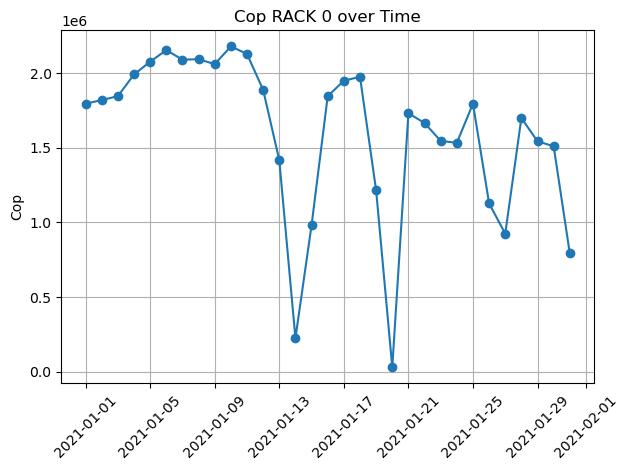

In [29]:
# RACK 0 Cop plotting for the month of January 2021:
start_date = datetime(2021, 1, 1)  # Start date
dates = [start_date + timedelta(days=i) for i in range(len(daily_Cop_rack0))]

# Plotting
plt.plot(dates, daily_Cop_rack0, marker='o')
plt.ylabel('Cop')
plt.title('Cop RACK 0 over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [37]:
# Now let's do it for the whole set of racks:
daily_Cop = {}

# Energy consumption:
for key, values in racks.items():
    dataset_P0_temp = dataset_P0[dataset_P0['node'].astype(int).isin(values)]
    dataset_P1_temp = dataset_P1[dataset_P1['node'].astype(int).isin(values)]
    dataset_P0_temp.loc[:, 'timestamp'] = pd.to_datetime(dataset_P0_temp['timestamp'])
    dataset_P0_temp.loc[:, 'date'] = dataset_P0_temp['timestamp'].dt.date
    dataset_P1_temp.loc[:, 'timestamp'] = pd.to_datetime(dataset_P1_temp['timestamp'])
    dataset_P1_temp.loc[:, 'date'] = dataset_P1_temp['timestamp'].dt.date

    # Now we order P0 once again by date
    grouped = dataset_P0_temp.groupby('date')
    daily_datasets_P0 = {}
    for day, group in grouped:
        daily_datasets_P0[day] = group.copy()

    # I can do the same for P1
    grouped = dataset_P1_temp.groupby('date')
    daily_datasets_P1 = {}
    for day, group in grouped:
        daily_datasets_P1[day] = group.copy()

    del(grouped)

    daily_total_energy = []
    for key_2 in daily_datasets_P0:
        daily_total_energy.append(daily_datasets_P0[key_2]['energy_kWh'].cumsum().iloc[-1] + daily_datasets_P1[key_2]['energy_kWh'].cumsum().iloc[-1])

    print(f'Rack {key} Tot. E: {daily_total_energy}')
    # Cop computation for the whole month of January 2021:
    daily_Cop[key] = np.multiply(daily_total_energy, daily_total_emission)

Rack 0 Tot. E: [266.1117777777052, 271.0888888889253, 272.3563888888789, 271.8186666666693, 274.1848333333562, 276.17577777779087, 274.71811111103426, 271.7474999999471, 273.4946666666514, 273.17455555557024, 273.9931666667088, 273.75911111110355, 217.112777777718, 31.16661111111068, 132.97883333333039, 274.0867222221932, 272.6419444443459, 268.75122222211655, 165.86194444441497, 4.312666666666655, 261.2164444443751, 260.98855555550097, 260.9167777777528, 260.5838888888875, 261.81338888888274, 155.38177777776974, 127.90255555554992, 261.41944444442794, 265.8634999999804, 261.3300555555296, 129.89949999998964]
Rack 1 Tot. E: [439.7796666667243, 401.1183888888847, 403.8042222222594, 490.68883333336885, 450.2714444444223, 427.0180555555298, 429.3180555556005, 466.70911111114197, 411.3422222221418, 398.522222222148, 399.39877777784346, 416.4069999999974, 317.16994444449585, 43.7267222222207, 195.2872777777873, 449.14527777772685, 370.6313888888357, 405.86188888888756, 252.30288888891596, 6

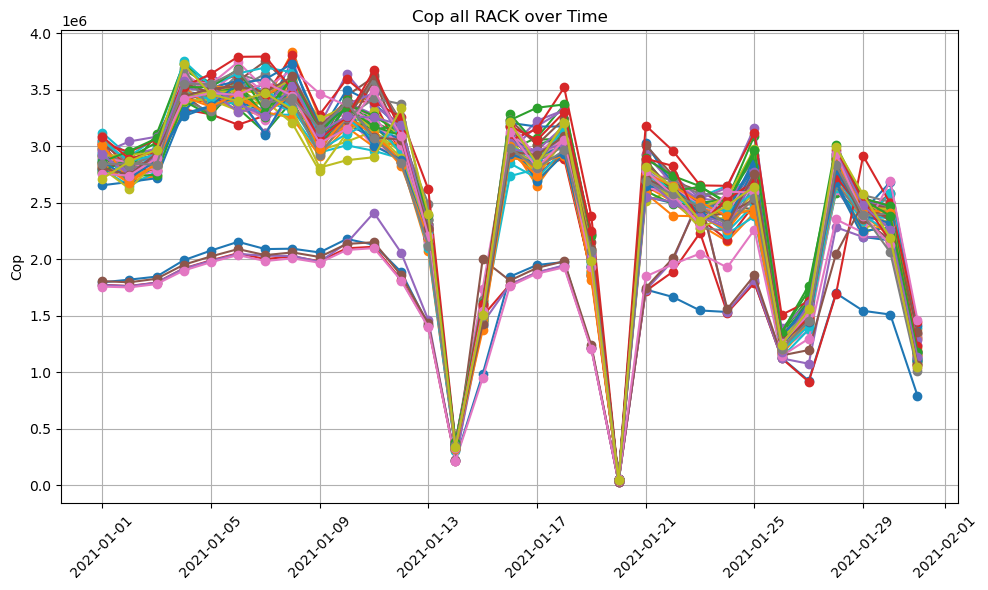

In [38]:
# All RACK Cop plotting for the month of January 2021:
start_date = datetime(2021, 1, 1)  # Start date
dates = [start_date + timedelta(days=i) for i in range(31)]

plt.figure(figsize=(10, 6)) 

for key, values in daily_Cop.items():
    plt.plot(dates, values, marker='o') 

# Plotting
plt.ylabel('Cop')
plt.title('Cop all RACK over Time')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()